In [127]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import warnings

In [128]:
import astropy 
import math 
import scipy 
from astropy.visualization import astropy_mpl_style #color/plotting
plt.style.use(astropy_mpl_style)

In [129]:
from pylab import imshow
from numpy import random
from PIL import Image
from numpy.linalg import inv
from __future__ import division
from matplotlib import colorbar
from scipy import stats

In [130]:
warnings.filterwarnings("ignore")

In [131]:
plt.figure(figsize=[12,8])
hitmap = hp.read_map("TEST.fits")
##rot = [+150.119,+2.205]

<Figure size 864x576 with 0 Axes>

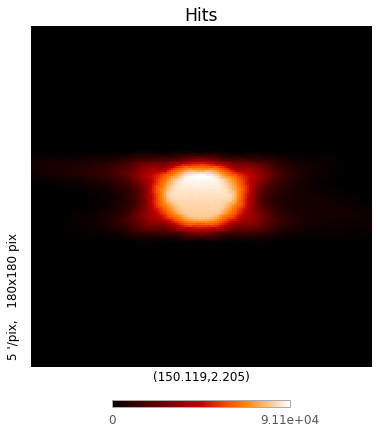

In [132]:
hit_new=np.array(hitmap,dtype='int64')
hit_new[hit_new == 0] = 40000
#hp.UNSEEN
hp.gnomview(hitmap,fig = 1, rot = [+150.119,+2.205], reso = 5, title="Hits",xsize=180,ysize=180) #coordinates for the hitsmap
#hp.graticule()

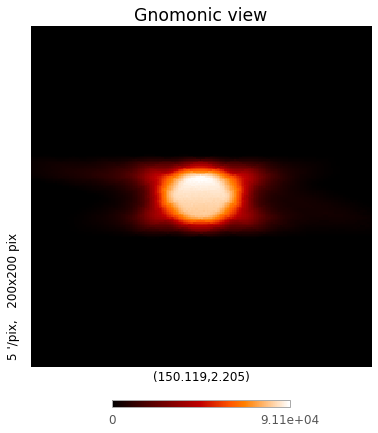

In [133]:
#n=hp.newvisufunc.projview(hitmap,rot = [+150.119,+2.205],return_only_data=True,projection_type='cart')
array=hp.gnomview(hitmap, rot = [+150.119,+2.205],reso=5, return_projected_map=True)

In [134]:
array.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [135]:
a=array[array>0]
print(a)

[ 2.  4.  6. ... 18. 14. 26.]


In [136]:
print(len(array))
np.shape(array)

200


(200, 200)

In [137]:
print(np.shape(a))

(9335,)


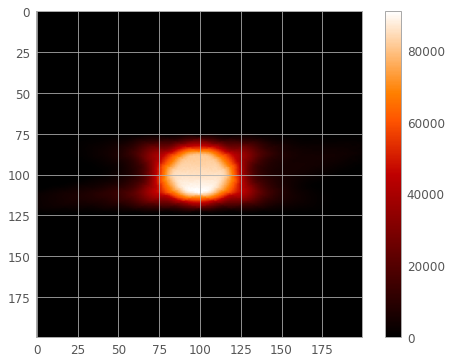

In [138]:
imshow(array)
plt.colorbar(imshow(array))

In [139]:
def WhiteNoiseMap(x_dim,y_dim, Atmosphere=False):
    global WNoise, atmosphere
    ANoise=1 #subject to change 
    WNoise=np.random.randn(x_dim,y_dim)*ANoise
    if Atmosphere==True: 
        atmosphere=np.random.randn(x_dim,y_dim)*WNoise 
        return atmosphere
    else: 
        return WNoise

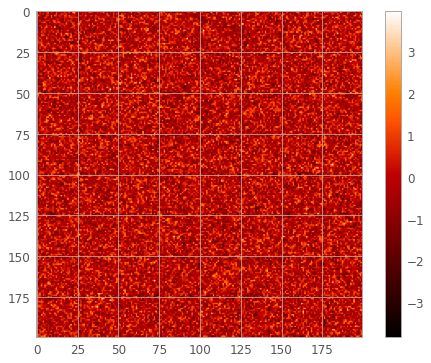

In [140]:
WhiteNoise=WhiteNoiseMap(200,200)
imshow(WhiteNoise)
plt.colorbar()

In [141]:
def Noisemap(hitsmap, whitenoise): 
    global N
    N=whitenoise/hitsmap
    return N

In [142]:
array[0]

masked_array(data=[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                   0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                   0., 0.

In [143]:
p=array.data
np.shape(p)

(200, 200)

[[ 1.47561670e+00  2.03097391e-01  4.38922876e-01 ...  1.40348431e+00
   6.17264681e-01 -2.31669136e-01]
 [ 5.50532606e-02 -9.91497397e-01  7.97783685e-01 ...  8.60059673e-02
   5.73124748e-03  2.09111332e+00]
 [-8.06468720e-01  3.92666451e-02  4.34093000e-01 ... -7.01390726e-01
   8.16370548e-01 -9.33213618e-01]
 ...
 [-1.25562703e-01 -9.35905338e-01  9.04654092e-01 ... -1.64085754e+00
   8.51032928e-02  2.24918655e+00]
 [ 8.39955608e-01  1.39144777e+00  8.03903763e-01 ... -1.18968266e-03
   9.09013597e-01  1.14909541e+00]
 [-2.79852929e-01  7.68910482e-01  7.09618571e-01 ...  1.13615369e+00
  -1.64616639e-01  3.82900996e-01]]


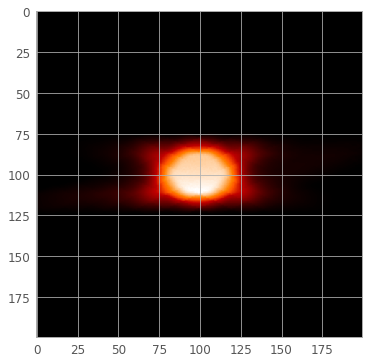

In [144]:
print(WNoise)
imshow(p)

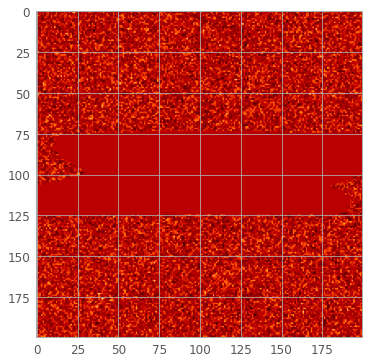

In [208]:
p=array.data
newarray=np.where(p==0, 1e-30, p)
x=WNoise/newarray
#imshow(x.data)
#WNoise[0]
imshow(x)

In [209]:
newarray.max()

91120.0

In [210]:
x

array([[ 1.47561670e+30,  2.03097391e+29,  4.38922876e+29, ...,
         1.40348431e+30,  6.17264681e+29, -2.31669136e+29],
       [ 5.50532606e+28, -9.91497397e+29,  7.97783685e+29, ...,
         8.60059673e+28,  5.73124748e+27,  2.09111332e+30],
       [-8.06468720e+29,  3.92666451e+28,  4.34093000e+29, ...,
        -7.01390726e+29,  8.16370548e+29, -9.33213618e+29],
       ...,
       [-1.25562703e+29, -9.35905338e+29,  9.04654092e+29, ...,
        -1.64085754e+30,  8.51032928e+28,  2.24918655e+30],
       [ 8.39955608e+29,  1.39144777e+30,  8.03903763e+29, ...,
        -1.18968266e+27,  9.09013597e+29,  1.14909541e+30],
       [-2.79852929e+29,  7.68910482e+29,  7.09618571e+29, ...,
         1.13615369e+30, -1.64616639e+29,  3.82900996e+29]])

In [211]:
def plot_figure(WhiteNoise, Hitsmap, NM, cmap='hot', figname="Maps.png"):
    fig, axx = plt.subplots(figsize=(9,9), dpi=100, nrows=1, ncols=3) #the ordering
    axx[0].imshow(WhiteNoise),cmap=cmap)
    axx[1].imshow(Hitsmap), cmap=cmap)
    axx[2].imshow(NM), cmap=cmap)

    plt.tight_layout()

    plt.colorbar(imshow(WhiteNoise),ax=axx[0],fraction=0.04)
    plt.colorbar(imshow(Hitsmap),ax=axx[1],fraction=0.04)
    plt.colorbar(imshow(NM),ax=axx[2],fraction=0.04)

    if figname: 
                 plt.savefig(figname,bbox_inches='tight')
    else:
                 plt.savefig("Maps.png",bbox_inches='tight')
            
    plt.show()

SyntaxError: unmatched ')' (<ipython-input-211-f8927fc93e0b>, line 3)

In [212]:
def plot_figure(WhiteNoise, Hitsmap, NM, cmap='summer', vmin=1e1, vmax=1e5, figname="Maps.png"):
    fig, axx = plt.subplots(figsize=(9,9), dpi=100, nrows=1, ncols=3) #the ordering
    a1 = axx[0].imshow(WhiteNoise,cmap=cmap)
    a2 = axx[1].imshow(Hitsmap, cmap=cmap , vmin=vmin, vmax=vmax)
    a3 = axx[2].imshow(NM, cmap=cmap)

    plt.tight_layout()

    plt.colorbar(a1,fraction=0.04)
    plt.colorbar(a2,fraction=0.04)
    plt.colorbar(a3,fraction=0.04)

    if figname: 
                 plt.savefig(figname,bbox_inches='tight')
    else:
                 plt.savefig("Maps.png",bbox_inches='tight')
            
    plt.show()

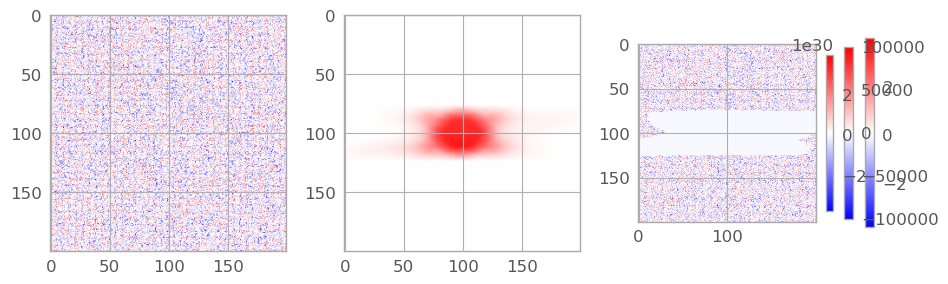

In [216]:
plot_figure(WNoise, newarray, x, cmap='bwr', vmin=-1e5, vmax=1e5,  figname="Maps.png")

In [219]:
np.min(newarray)
#np.min(WNoise)

1e-30

In [ ]:
#write everything neatly and precisly and put more comments
#make function for the healpy read in hitsmap 
    #remove the mask and everything in the function itself 
#perfect code as much as possible 
#get_map()

In [72]:
print(atmosphere)

[[-0.22772211 -0.42888707 -0.27765895 ...  0.08146301  1.21973573
   0.15454435]
 [ 0.08601415 -0.13872747 -0.46107987 ...  0.37192758  0.53282376
  -1.38940298]
 [-0.04023914  0.14655193 -1.12887073 ...  1.0389908  -0.36279223
   0.41205454]
 ...
 [-0.22131186 -0.08571446  0.17228481 ... -1.69801116 -0.01585598
   2.26025731]
 [-0.31480563 -1.43170726 -0.34716932 ... -0.10836658  0.4973379
  -0.03760501]
 [-0.96090055  0.2899394   0.50937282 ... -0.66698915 -0.51834483
  -0.50821029]]


In [73]:
print(N)

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


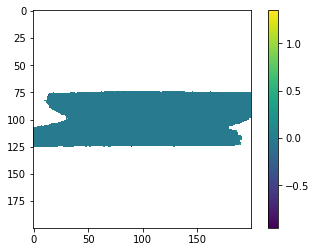

In [74]:
NM=Noisemap(array,WhiteNoise)
imshow(NM)
plt.colorbar()
print(NM)

In [53]:
print(N)

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


In [28]:
ANoise=1 #subject to change 
WNoise=np.random.randn(200,200)*ANoise
atmosphere=np.random.randn(200,200)*WNoise

[[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]


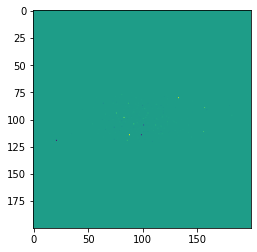

In [56]:
n=array/WNoise
print(n)
imshow(n)

[2.8967691464274696 1.2894534288629944 13.678707149106096 ...
 4.624753256542097 130.39948965157762 97.63613445673306]


TypeError: Invalid shape (4658,) for image data

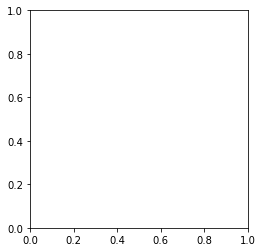

In [60]:
print(n[n>0])
imshow((n[n>0]))

In [14]:
#hp.query_strip(1024,150.119,2.205,)

In [15]:
#manual deg to rad since the function is not working 
theta=(np.pi/180)*150.119
print(theta)

2.6200708198013674


In [16]:
phi=(np.pi/180)*2.205
print(phi)

0.038484510006474966


In [17]:
(theta,phi)

(2.6200708198013674, 0.038484510006474966)